<a href="https://colab.research.google.com/github/zhengwu123/2016_summer/blob/master/Master's_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload local files to colab

from google.colab import files
files.upload()

{}

In [ ]:
#unzip files
!unzip "/content/phonecall.zip" -d "/content/plot2"
!unzip "/content/spoof.zip" -d "/content/plot2"

Archive:  /content/phonecall.zip
  inflating: /content/plot2/plot 1 round1 phonecall.png  
  inflating: /content/plot2/plot 1 round2 phonecall.png  
  inflating: /content/plot2/plot 1 round3 phonecall.png  
  inflating: /content/plot2/plot 1 round4 phonecall.png  
  inflating: /content/plot2/plot 1 round5 phonecall.png  
  inflating: /content/plot2/plot 1 round6 phonecall.png  
  inflating: /content/plot2/plot 1 round7 phonecall.png  
  inflating: /content/plot2/plot 1 round8 phonecall.png  
  inflating: /content/plot2/plot 1 round9 phonecall.png  
  inflating: /content/plot2/plot 1 round10 phonecall.png  
  inflating: /content/plot2/plot 1 round11 phonecall.png  
  inflating: /content/plot2/plot 1 round12 phonecall.png  
  inflating: /content/plot2/plot 1 round13 phonecall.png  
  inflating: /content/plot2/plot 1 round14 phonecall.png  
  inflating: /content/plot2/plot 1 round15 phonecall.png  
  inflating: /content/plot2/plot 1 round16 phonecall.png  
  inflating: /content/plot2/plot

In [ ]:
#process images and save them into 2D arrays
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
nrows = 150
ncolumns = 150
channels = 3  #change to 1 (3 for color) if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'spoofing' in image:
            y.append(1)
        elif 'phonecall' in image:
          y.append(0)
    
    return X, y

In [ ]:
#process images and save them into 2D arrays
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
nrows = 150
ncolumns = 150
channels = 3  #change to 1 (3 for color) if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image_rnn(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE), (nrows,ncolumns)))  #Read the image
        #get the labels
        if 'spoofing' in image:
            y.append(1)
        elif 'phonecall' in image:
          y.append(0)
    
    return X, y

In [ ]:
#load rnn array
import os
voip_data = ['plot2/{}'.format(i) for i in os.listdir("plot2/") if 'spoofing' in i]
phonecall_data = ['plot2/{}'.format(i) for i in os.listdir("plot2/") if 'phonecall' in i]
train_data = voip_data + phonecall_data
print(train_data)
X_rnn,y_rnn = read_and_process_image_rnn(train_data)

['plot2/spoofing call plot 1 round87.png', 'plot2/spoofing call plot 1 round135.png', 'plot2/spoofing call plot 1 round101.png', 'plot2/spoofing call plot 1 round112.png', 'plot2/spoofing call plot 1 round125.png', 'plot2/spoofing call plot 1 round66.png', 'plot2/spoofing call plot 1 round45.png', 'plot2/spoofing call plot 1 round67.png', 'plot2/spoofing call plot 1 round72.png', 'plot2/spoofing call plot 1 round106.png', 'plot2/spoofing call plot 1 round2.png', 'plot2/spoofing call plot 1 round74.png', 'plot2/spoofing call plot 1 round146.png', 'plot2/spoofing call plot 1 round167.png', 'plot2/spoofing call plot 1 round42.png', 'plot2/spoofing call plot 1 round31.png', 'plot2/spoofing call plot 1 round56.png', 'plot2/spoofing call plot 1 round37.png', 'plot2/spoofing call plot 1 round104.png', 'plot2/spoofing call plot 1 round43.png', 'plot2/spoofing call plot 1 round59.png', 'plot2/spoofing call plot 1 round23.png', 'plot2/spoofing call plot 1 round50.png', 'plot2/spoofing call plot 

In [ ]:
#load images into array
import os
voip_data = ['plot2/{}'.format(i) for i in os.listdir("plot2/") if 'spoofing' in i]
phonecall_data = ['plot2/{}'.format(i) for i in os.listdir("plot2/") if 'phonecall' in i]
train_data = voip_data + phonecall_data
print(train_data)
X,y = read_and_process_image(train_data)

['plot2/spoofing call plot 1 round87.png', 'plot2/spoofing call plot 1 round135.png', 'plot2/spoofing call plot 1 round101.png', 'plot2/spoofing call plot 1 round112.png', 'plot2/spoofing call plot 1 round125.png', 'plot2/spoofing call plot 1 round66.png', 'plot2/spoofing call plot 1 round45.png', 'plot2/spoofing call plot 1 round67.png', 'plot2/spoofing call plot 1 round72.png', 'plot2/spoofing call plot 1 round106.png', 'plot2/spoofing call plot 1 round2.png', 'plot2/spoofing call plot 1 round74.png', 'plot2/spoofing call plot 1 round146.png', 'plot2/spoofing call plot 1 round167.png', 'plot2/spoofing call plot 1 round42.png', 'plot2/spoofing call plot 1 round31.png', 'plot2/spoofing call plot 1 round56.png', 'plot2/spoofing call plot 1 round37.png', 'plot2/spoofing call plot 1 round104.png', 'plot2/spoofing call plot 1 round43.png', 'plot2/spoofing call plot 1 round59.png', 'plot2/spoofing call plot 1 round23.png', 'plot2/spoofing call plot 1 round50.png', 'plot2/spoofing call plot 

In [ ]:
#show images data

X = np.array(X)
y = np.array(y)
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (475, 150, 150, 3)
Shape of labels is: (475,)


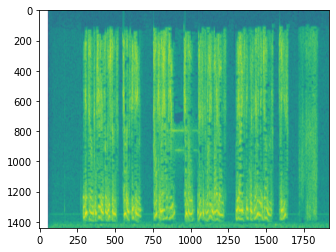

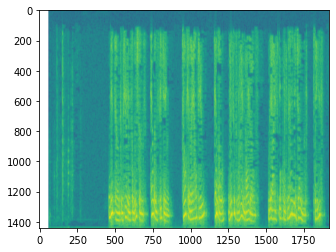

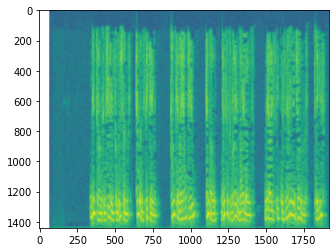

In [ ]:
#plot our spectrogram 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_data[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_rnn = np.array(X_rnn)
y_rnn = np.array(y_rnn)

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.1, random_state=2)
print("Shape of train images is:", X_rnn.shape)
print("Shape of labels is:", y_rnn.shape)

Shape of train images is: (475, 150, 150)
Shape of labels is: (475,)


In [ ]:
#split test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
batch_size=20
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 40)
gen_flow1 = gen.flow(x_train,y_train, batch_size=batch_size)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers

model_di = Sequential()

#add conv1
model_di.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_di.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_di.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_di.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_di.add(Flatten())
model_di.add(Dense(512, activation='relu'))
model_di.add(Dense(1, activation='sigmoid'))
model_di.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#with no augmentation
model_di.fit(x_train,y_train,batch_size=10,epochs=20)
#history.history
#with augmentation
#r_di = model_di.fit(gen_flow1,steps_per_epoch=len(x_train) / batch_size, epochs=50)
#model_di.evaluate(x_test,y_test)
model_di.summary()

Epoch 1/20
43/43 [==============================] - 10s 6ms/step - loss: 25.5463 - accuracy: 0.6557
Epoch 2/20
43/43 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8361
Epoch 3/20
43/43 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 0.8618
Epoch 4/20
43/43 [==============================] - 0s 5ms/step - loss: 0.2158 - accuracy: 0.9133
Epoch 5/20
43/43 [==============================] - 0s 5ms/step - loss: 0.2272 - accuracy: 0.9016
Epoch 6/20
43/43 [==============================] - 0s 5ms/step - loss: 0.2663 - accuracy: 0.9087
Epoch 7/20
43/43 [==============================] - 0s 5ms/step - loss: 0.1496 - accuracy: 0.9508
Epoch 8/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.9742
Epoch 9/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9742
Epoch 10/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9789
Epoch 11/20
43/43

In [ ]:
#evaluation of our CNN model
model_di.evaluate(x_test,y_test)

2/2 [==============================] - 0s 21ms/step - loss: 0.1968 - accuracy: 0.9167


[0.1968037635087967, 0.9166666865348816]

In [ ]:
#RNN model

from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D,SimpleRNN
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers
import tensorflow as tf

model_RNN = Sequential()
model_RNN.add(SimpleRNN(150, input_shape=(150,150), return_sequences=True))
model_RNN.add(SimpleRNN(120,  return_sequences=True))
model_RNN.add(SimpleRNN(60,  return_sequences=True))
model_RNN.add(Flatten())
model_RNN.add(Dense(512, activation='tanh'))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_RNN.fit(x_train_rnn,y_train_rnn,batch_size=10,epochs=100)
model_RNN.summary()

Epoch 1/100
43/43 [==============================] - 16s 324ms/step - loss: 2.1599 - accuracy: 0.5340
Epoch 2/100
43/43 [==============================] - 14s 331ms/step - loss: 0.6874 - accuracy: 0.5386
Epoch 3/100
43/43 [==============================] - 14s 324ms/step - loss: 0.6894 - accuracy: 0.5785
Epoch 4/100
43/43 [==============================] - 14s 330ms/step - loss: 0.7054 - accuracy: 0.5293
Epoch 5/100
43/43 [==============================] - 16s 381ms/step - loss: 0.6850 - accuracy: 0.5621
Epoch 6/100
43/43 [==============================] - 14s 329ms/step - loss: 0.6873 - accuracy: 0.5527
Epoch 7/100
43/43 [==============================] - 14s 321ms/step - loss: 0.6878 - accuracy: 0.5855
Epoch 8/100
43/43 [==============================] - 14s 325ms/step - loss: 0.6916 - accuracy: 0.5855
Epoch 9/100
43/43 [==============================] - 14s 324ms/step - loss: 0.6879 - accuracy: 0.5574
Epoch 10/100
43/43 [==============================] - 14s 324ms/step - loss: 0.711

In [ ]:
model_RNN.evaluate(x_test_rnn,y_test_rnn)

2/2 [==============================] - 1s 107ms/step - loss: 0.6934 - accuracy: 0.4375


[0.6933565735816956, 0.4375]

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(150, input_shape=(150,150),activation='relu',return_sequences=True))
model.add(LSTM(120,  return_sequences=True))
model.add(LSTM(60,  return_sequences=True))
model.add(Flatten())
model.add((Dense(20,activation='tanh')))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

model.fit(x_train_rnn,y_train_rnn, epochs=100, batch_size=10, verbose=2,shuffle=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 150)          180600    
                                                                 
 lstm_1 (LSTM)               (None, 150, 120)          130080    
                                                                 
 lstm_2 (LSTM)               (None, 150, 60)           43440     
                                                                 
 flatten_3 (Flatten)         (None, 9000)              0         
                                                                 
 dense_6 (Dense)             (None, 20)                180020    
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 534,161
Trainable params: 534,161
Non-tr

In [ ]:
model.evaluate(x_test_rnn,y_test_rnn)

2/2 [==============================] - 1s 41ms/step - loss: nan - accuracy: 0.5625


[nan, 0.5625]